<a href="https://colab.research.google.com/github/JakeAMystery/FORE_ClassWork/blob/main/DLNLP/DLNLP_simpleNN_singleNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/a-single-neuron

In [ ]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Deep Learning"

In [ ]:
# 2.2 Full file path:
path = Path(pathToFolder) / "red_wine.csv"

In [ ]:
# 3.0 Read data
red_wine = pd.read_csv(path)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 3.1
red_wine.shape   # (1599, 12)
red_wine.dtypes

(1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# 3.2 Get target and predictors:
y = red_wine.pop("quality")
X = red_wine

In [ ]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [ ]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [ ]:
# 4.1
model.add(layers.Input( shape = (11,) ) )

In [ ]:
# 4.2
model.add(layers.Dense(1,))

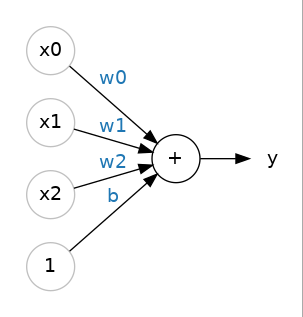

In [ ]:
# 4.2.1
weights, bias = model.weights

In [ ]:
#For multiple Layers
#[(j.numpy(),k.numpy()) for j,k in [i.weights for i in model.layers ]]

[(array([[-0.46699417],
         [-0.38675195],
         [ 0.57626003],
         [ 0.610184  ],
         [ 0.09096384],
         [-0.48143297],
         [ 0.38182193],
         [-0.38967544],
         [ 0.10301518],
         [ 0.3751046 ],
         [-0.42660332]], dtype=float32),
  array([0.], dtype=float32)),
 (array([[1.6712312]], dtype=float32), array([0.], dtype=float32)),
 (array([[1.2850426]], dtype=float32), array([0.], dtype=float32))]

In [ ]:
# 4.2.2
weights

<tf.Variable 'dense_4/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.34893054],
       [-0.16410333],
       [-0.11868739],
       [ 0.5765478 ],
       [-0.3084217 ],
       [-0.6800502 ],
       [-0.41814208],
       [ 0.17712045],
       [ 0.64640087],
       [ 0.01779252],
       [-0.70021254]], dtype=float32)>

In [ ]:
# 4.2.3
bias

<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [ ]:
#4.3 Compile
model.compile( loss = "mae")

In [ ]:
# 4.4 Train
model.fit(X,y, epochs = 100 )

Epoch 1/100
50/50 [==============================] - 1s 1ms/step - loss: 13.1050
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 9.2617
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 6.4155
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 4.5407
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 3.5117
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 2.8263
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 2.3190
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 1.8434
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 1.4428
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 1.1348
Epoch 11/100
50/50 [==============================] - 0s 1ms/step - loss: 0.9479
Epoch 12/100
50/50 [==============================] - 0s 1ms/step - loss: 0.8186
Epoch 13/100
50/50 [================

In [ ]:
# 5.0 Predict
pred = model.predict(X)

50/50 [==============================] - 0s 1ms/step


In [ ]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [ ]:
pred

array([[5.],
       [5.],
       [5.],
       ...,
       [6.],
       [5.],
       [6.]], dtype=float32)

In [ ]:
# 5.1.1
y.shape

(1599,)

In [ ]:
# 5.2 Compare:
f'{np.sum(pred == y.values.reshape(1599,1))/1599*100:.2f}% Accuracy'

'57.35% Accuracy'

In [ ]:
######### --------Done ---------------

In [ ]:
model2 = keras.Sequential()

In [ ]:
model2.add(layers.Input( shape = (11,) ) )

In [ ]:
model2.add(layers.Dense(2,))

In [ ]:
model2 = keras.Sequential()
model2.add(layers.Input( shape = (11,) ) )
model2.add(layers.Dense(2,))
model2.compile( loss = "mae")
model2.add(layers.Dense(1,))
model2.compile( loss = "mae")
model2.fit(X,y, epochs = 100 )
pred = np.round(model2.predict(X))
f'{np.sum(pred == y.values.reshape(1599,1))/1599*100:.2f}% Accuracy'

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 2.0470
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7914
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7004
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.6225
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1.5443
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1.4747
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 1.4033
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3404
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2705
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2248
Epoch 11/100
50/50 [==============================] - 0s 3ms/step - loss: 1.1673
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1073
Epoch 13/100
50/50 [=================

50/50 [==============================] - 0s 1ms/step


'58.29% Accuracy'

In [ ]:
model3 = keras.Sequential()
model3.add(layers.Input( shape = (11,) ) )
model3.add(layers.Dense(3,))
model3.compile( loss = "mae")
model3.add(layers.Dense(1,))
model3.compile( loss = "mae")
model3.fit(X,y, epochs = 100 )
pred = np.round(model3.predict(X))
f'{np.sum(pred == y.values.reshape(1599,1))/1599*100:.2f}% Accuracy'

Epoch 1/100
50/50 [==============================] - 1s 3ms/step - loss: 10.5399
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 8.5466
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 6.6522
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 4.8942
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 3.2649
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1.9970
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 1.3516
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0341
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8294
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7280
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6496
Epoch 13/100
50/50 [================

50/50 [==============================] - 0s 1ms/step


'57.35% Accuracy'

In [ ]:
def single_hidden_layer_model(size, X, y):
  model3 = keras.Sequential()
  model3.add(layers.Input( shape = (11,) ) )
  model3.add(layers.Dense(size,))
  model3.compile( loss = "mae")
  model3.add(layers.Dense(1,))
  model3.compile( loss = "mae")
  model3.fit(X,y, epochs = 100 , verbose=0)
  pred = np.round(model3.predict(X))
  return np.sum(pred == y.values.reshape(1599,1))/1599*100

In [ ]:
for i in range(10):
  accuracy = single_hidden_layer_model(i, X, y)
  print(f'{i:<{5}}{accuracy:.2f}% Accuracy')

50/50 [==============================] - 0s 1ms/step
0    42.59% Accuracy
50/50 [==============================] - 0s 1ms/step
1    57.41% Accuracy
50/50 [==============================] - 0s 2ms/step
2    58.04% Accuracy
50/50 [==============================] - 0s 1ms/step
3    53.47% Accuracy
50/50 [==============================] - 0s 1ms/step
4    58.41% Accuracy
50/50 [==============================] - 0s 2ms/step
5    58.10% Accuracy
50/50 [==============================] - 0s 1ms/step
6    58.47% Accuracy
50/50 [==============================] - 0s 2ms/step
7    59.72% Accuracy
50/50 [==============================] - 0s 1ms/step
8    58.35% Accuracy
50/50 [==============================] - 0s 2ms/step
9    53.03% Accuracy


In [ ]:
model4 = keras.Sequential()
model4.add(layers.Input( shape = (11,) ) )
model4.add(layers.Dense(1,))
model4.compile( loss = "mae")
model4.add(layers.Dense(2,))
model4.compile( loss = "mae")
model4.add(layers.Dense(1,))
model4.compile( loss = "mae")
model4.fit(X,y, epochs = 100 )
pred = np.round(model4.predict(X))
f'{np.sum(pred == y.values.reshape(1599,1))/1599*100:.2f}% Accuracy'

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 5.3206
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 3.7863
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 2.8731
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 2.6698
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 2.5022
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 2.3463
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 2.1914
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 2.0361
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 1.8857
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 1.7399
Epoch 11/100
50/50 [==============================] - 0s 1ms/step - loss: 1.5730
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3994
Epoch 13/100
50/50 [=================

50/50 [==============================] - 0s 1ms/step


'56.35% Accuracy'

In [ ]:
def two_hidden_layer_model(size, X, y):
  model3 = keras.Sequential()
  model3.add(layers.Input( shape = (11,) ) )
  model3.add(layers.Dense(size[0],))
  model3.compile( loss = "mae")
  model3.add(layers.Dense(size[1],))
  model3.compile( loss = "mae")
  model3.add(layers.Dense(1,))
  model3.compile( loss = "mae")
  model3.fit(X,y, epochs = 100 , verbose=0)
  pred = np.round(model3.predict(X))
  return np.sum(pred == y.values.reshape(1599,1))/1599*100

In [ ]:
for j in range(1,11):
  for i in range(1,11):
    accuracy = two_hidden_layer_model((2**i,2**j), X, y)
    print(f'{2**i:<{5}}{2**j:<{5}}{accuracy:.2f}% Accuracy')

50/50 [==============================] - 0s 1ms/step
2    2    58.66% Accuracy
50/50 [==============================] - 0s 2ms/step
4    2    52.85% Accuracy
50/50 [==============================] - 0s 1ms/step
8    2    55.10% Accuracy
50/50 [==============================] - 0s 1ms/step
16   2    45.15% Accuracy
50/50 [==============================] - 0s 1ms/step
32   2    54.66% Accuracy
50/50 [==============================] - 0s 1ms/step
64   2    52.85% Accuracy
50/50 [==============================] - 0s 1ms/step
128  2    58.10% Accuracy
50/50 [==============================] - 0s 1ms/step
256  2    59.04% Accuracy
50/50 [==============================] - 0s 1ms/step
512  2    55.72% Accuracy
50/50 [==============================] - 0s 2ms/step
1024 2    50.41% Accuracy
50/50 [==============================] - 0s 1ms/step
2    4    57.72% Accuracy
50/50 [==============================] - 0s 1ms/step
4    4    57.10% Accuracy
50/50 [==============================] - 0s 1ms/step